# CSCI 3202, Spring 2023
# Hill Climbing Notebook

Before we begin, let's load a few packages that we might find useful.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

<br>

<img src="http://1.bp.blogspot.com/-mWUxSF7q_JY/Vbd84OcwaSI/AAAAAAAA7No/5iT8gMZBHw8/s1600/seilschaft2---helliventures-joachimhellinger.jpg=" width="300"/>



## Problem 1: Hill-climbing

The over-arching goal here is to maximize some objective function.  You can also look at this as minimizing some kind of a loss... and you will!

In many applications, the objective function might turn out to be a Gaussian function, such as this one:

In [3]:
def gaussian_objective(state):
    return stats.norm.pdf(x=state, loc=5, scale=2)

Note the this objective function is just taking in some value $\texttt{state}$ and returning the value of the normal probability density function, centered at $\texttt{loc} = \mu = 5$ and with standard deviation $\texttt{scale} = \sigma = 2$:
$$f(\texttt{state}) = \dfrac{1}{\sqrt{2\pi}\sigma} e^{-\dfrac{(\texttt{state}-\mu)^2}{2\sigma^2}}$$

For good measure, let's plot this thing up and see what it looks like.

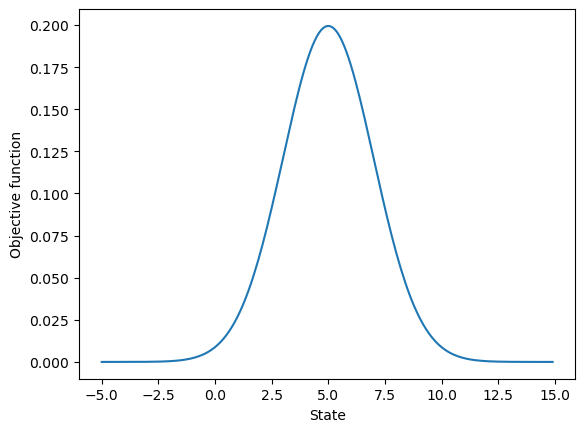

In [4]:
x = np.arange(-5,15,0.1)
f = [gaussian_objective(state) for state in x]

plt.plot(x,f)
plt.xlabel('State')
plt.ylabel('Objective function')
plt.show()

Neat.

<br>

The first order of business if we want to maximize some objective function using the **local search** techniques we just learned will be to set up a class structure to make this easier.

If we do this in a general enough way for **hill-climbing** (this first part), we will only need to modify a few things to tackle a trickier problem using **simulated annealing**.



### (1a)  A class structure to solve problems

So first, let's define a class to keep track of the `state`.  This is the quantity we want to adjust in order to optimize the objective function.  That sentence indicates the two values we really need to keep track of for a `state`:
1. the value of `state`
2. the value of the `objective_function` when evaluated at `state`

In [5]:
class state:

    def __init__(self, node, value):
        self.node = node
        self.value = value    

Now we need to define our problem.  This should be entirely self-contained, so that we need to feed the `hill_climb` optimization routine below a fairly generic problem description, and it can solve it, so we can easily feed in different problems.

**The goal** with this class structure is to have everything that is **problem-specific** sent into the hill-climbing optimization/local search be self-contained within the `problem` object.

In [6]:
class problem:
    
    def __init__(self, initial, objective_function, stepsize):
        self.initial_state = initial
        self.current_state = initial
        self.objective_function = objective_function
        self.stepsize = stepsize
        
    def moves(self):
        '''return all possible moves to make from the current_state'''
        all_moves = []
        # could move right...
        all_moves.append(self.current_state.node + self.stepsize)
        # ... or left!
        all_moves.append(self.current_state.node - self.stepsize)
        return all_moves

Finally, we can turn our Hill-climbing pseudocode into real code, that takes only two arguments and returns the `state` that optimizes the `objective_function`.  Note that the return can be done implicitly by manipulating the current state within our `problem`, or we could code it up as an explicit output.

In [7]:
def hill_climb(problem, n_iter):
    
    # iterate until we can't do any better
    for k in range(n_iter):
        nextMove, nextValue = problem.best_move()
        if nextValue <= problem.current_state.value:
            return problem.current_state
        #print(problem.current_state, nextMove)
        problem.current_state.node, problem.current_state.value = nextMove, nextValue
    print('reached n_iter')
    return False

class problem_hillclimb(problem):
    
    def best_move(self):
        '''return the best move possible from the current_state'''
        # what moves are possible?
        all_moves = self.moves()
        # what is objective function for each of them?
        obj_func = [self.objective_function(move) for move in all_moves]
        best = all_moves[max(zip(obj_func, range(len(obj_func))))[1]]
        return best, np.max(obj_func)



### (1b)  Ready to solve!

Let's start by creating an `initial_state` for our problem.

In [8]:
initial_state = state(node=1, value=gaussian_objective(1))

Now we need an instance of our `problem`.

In [9]:
gaussian_problem = problem_hillclimb(initial=initial_state, objective_function=gaussian_objective, stepsize=0.1)

Finally, we can turn out `hill_climb` algorithm loose on this problem.

In [10]:
out = hill_climb(gaussian_problem, n_iter=50)
print(out.node, out.value)

4.999999999999999 0.19947114020071635


## A couple extensions

That's good and all, but that particular objective function was just a single univariate Gaussian.  It turns out that the real world is tougher than that.  So let's tackle some tougher problems, shall we?



### (1c) Minimization

First, it might be the case that we want to ***minimize*** an objective function instead of maximizing it.  Modify your hill-climbing codes to tackle the problem of minimization.  Note:  this ought to be do-able by modifying a single line of code from above...

In [18]:
def hill_climb(problem, n_iter):
    
    # iterate until we can't do any better
    for k in range(n_iter):
        nextMove, nextValue = problem.best_move()
        if nextValue >= problem.current_state.value:
            return problem.current_state
        #print(problem.current_state, nextMove)
        problem.current_state.node, problem.current_state.value = nextMove, nextValue
    print('reached n_iter')
    return False

class problem_hillclimb(problem):
    
    def best_move(self):
        '''return the best move possible from the current_state'''
        # what moves are possible?
        all_moves = self.moves()
        # what is objective function for each of them?
        obj_func = [self.objective_function(move) for move in all_moves]
        best = all_moves[min(zip(obj_func, range(len(obj_func))))[1]]
        return best, np.min(obj_func)

Now **define your own** objective function to minimize!  Easy options include concave-up quadratic functions just slapping a $-$ sign into the Gaussian objective function defined above.  Then turn your descent algorithm loose on the minimization problem.

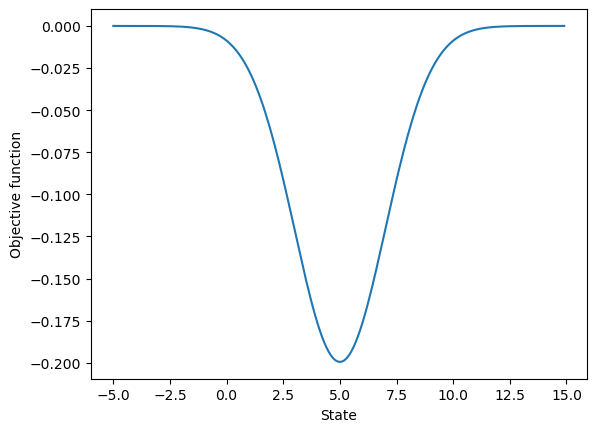

In [19]:
x = np.arange(-5,15,0.1)
f = [gaussian_objective(state) for state in x]

plt.plot(x,f)
plt.xlabel('State')
plt.ylabel('Objective function')
plt.show()

In [20]:
def gaussian_objective(state):
    return -stats.norm.pdf(x=state, loc=5, scale=2)

initial_state = state(node=1, value=gaussian_objective(1))
gaussian_problem = problem_hillclimb(initial=initial_state, objective_function=gaussian_objective, stepsize=0.1)
out = hill_climb(gaussian_problem, n_iter=50)
print(out.node, out.value)

4.999999999999999 -0.19947114020071635



### (1d)  Random restarts

That single Gaussian actually covers many real-world applications of optimization and local search, but many other applications lead to "bumpier" objective functions.  Suppose you are trying to fit a model to noisy data, and suppose each of your data points has normally-distributed uncertainty.  Then the objective function you would like to minimize could take the form of the sum of several Gaussian distributions, like so:

$$f(\texttt{state}) = \dfrac{1}{\sqrt{2\pi}\sigma} \left(e^{-\dfrac{(\texttt{state}-\mu_0)^2}{2\sigma^2}} + 
e^{-\dfrac{(\texttt{state}-\mu_1)^2}{2\sigma^2}} + 
e^{-\dfrac{(\texttt{state}-\mu_2)^2}{2\sigma^2}} + 
e^{-\dfrac{(\texttt{state}-\mu_3)^2}{2\sigma^2}} + 
e^{-\dfrac{(\texttt{state}-\mu_4)^2}{2\sigma^2}}\right)$$

Here, $\mu_i$ denotes the data points you have, $\sigma$ is assumed to be an uncertainty shared by all of them, and $\texttt{state}$ is your model's output, which you want to fit through those data points.

If we let $\sigma=1$, $\mu_0 = 0$, $\mu_1 = 2.1$, $\mu_2 = 4$, $\mu_3 = 4$ and $\mu_4 = 8$, then we end up with the following objective function, `several_gaussian_objective(state)`:

In [21]:
def several_gaussian_objective(state):
    locs = [0,2.1,4,4,8] # centers of a bunch of normal distributions
    #locs = [0, 2, 4, 6, 8]
    objective_value = 0
    # objective function is actually just the sum of a bunch of normal pdfs
    for loc in locs:
        objective_value += stats.norm.pdf(state, loc=loc, scale=1)
    return objective_value

Plot up this new objective function as a function of `state`.  What do you notice?  Will our "vanilla" hill-climbing routine successfully climb the hill and maximize this objective function for *any* initial state?

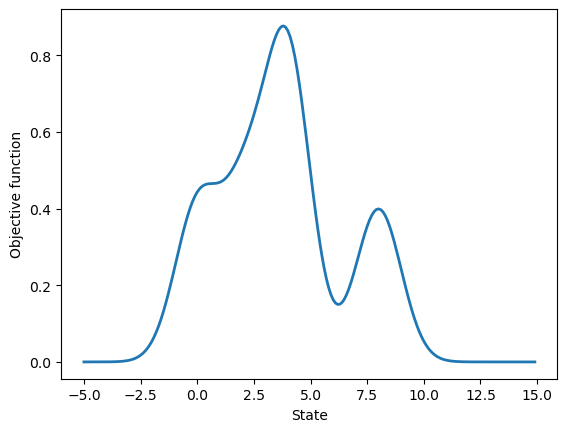

In [22]:
x = np.arange(start=-5, stop=15, step=0.1)
fx = [several_gaussian_objective(xk) for xk in x]
plt.plot(x, fx, lw=2)
plt.xlabel('State')
plt.ylabel('Objective function')
plt.show()

Note that we can check about where the global maximum is fairly easily:

In [24]:
max(zip(fx, x))

(0.8764853553213469, 3.7999999999999687)

Let's modify our vanilla hill-climbing solution approach from **(1b)** to include 500 random restarts for the initial state.

The following code will draw `n_restarts` random samples from the range $[0, 1)$.

In [25]:
n_restarts = 500
sample = np.random.random(size=n_restarts)

Modify that to draw instead from the range $[-2, 10)$.  Use those samples to create an **ensemble** of the values of `state` for which the objective function is maximized.  Plot a histogram of them, and make a conclusion about what the "best guess" for the maximal `state` is.

[ 8.21049999  6.30826089 -1.76048459  2.53620882  8.48339255 -1.51143827
  6.87148497  5.38943561  0.6073403   0.36654158  4.0391008   3.62510195
  9.65350358  2.98051118  4.17336974  9.78202098  4.08426951  8.08193429
  9.10255765  7.33363119  0.43950896  6.14393037  9.2441273   8.15923142
  7.39166912 -1.16223415  4.09493103  6.87743267  2.29279657 -1.10931504
  6.3960271   2.59556911  8.99286427 -1.31011323  5.78390215  5.21735223
  2.65519905  0.75770761  8.57974818  2.1829735   4.74580433  7.38550334
  1.91515495  8.60139638  7.95421305  5.00079449 -1.30422462  4.23931121
  4.14313969  4.38524912 -1.80006652 -1.89659772 -1.33849232  4.79019583
 -0.65108837 -0.81632034 -0.95276291  4.82652755 -0.10874342  6.22532269
  5.14755803  1.95790469  2.4404204   4.58829688  8.98154115 -1.9259333
  4.6369433   9.61641082  3.7667355   0.93072409  1.58040023  0.87251248
 -0.71890518  1.32876709  6.73558628  0.20192248  4.32844537  1.08636754
  8.0532357   9.38317564  7.942174    5.66454988  4.

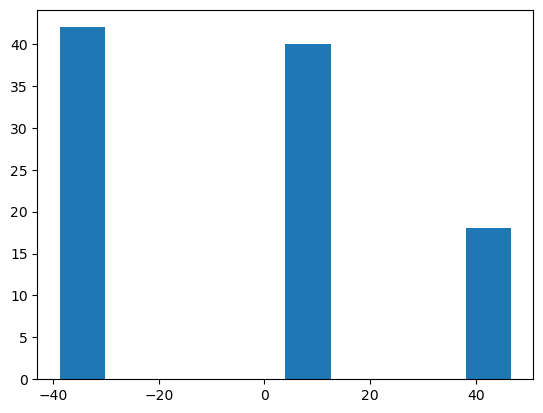

In [26]:
n_restarts = 100
max_found = []
range_init = [-2, 10]
initial_values = np.random.random(size=n_restarts)*np.diff(range_init)+range_init[0]
#initial_values = np.random.uniform(-2,10,size=n_restarts)
print(initial_values)

for n in range(n_restarts):
    initial_state = state(node=initial_values[n], value=several_gaussian_objective(initial_values[n]))
    gaussian_problem = problem_hillclimb(initial=initial_state, objective_function=several_gaussian_objective, stepsize=0.1)
    out = hill_climb(gaussian_problem, n_iter=500)
    max_found.append(out.node)
    
print(max_found)
plt.hist(max_found)
plt.show()